In [1]:
import ROOT as R
import decode as decode
import os
import math
c=R.TCanvas()

%jsroot off

Welcome to JupyROOT 6.16/00


Subrun 2 TP pattern 15 <br>
Subrun 3 TP pattern 1

In [2]:
def get_last_file_num(mypath, number):
    acq_to_return=""
    onlyfiles = [f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath, f)) and 'ACQ_log' in f)]
    for F in onlyfiles:
        if "{}".format(number) in F:
            acq_to_return=F
    onlyfiles = [f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath, f)) and '.dat' in f)]
    for F in onlyfiles:
        if "{}".format(number) in F:
            data_to_return=F
    return (acq_to_return,data_to_return)

In [3]:
def extract_num_triggers(filename):
    with open (filename,'r') as log_file:
        for line in log_file.readlines():
            if "total packets" in line:
                return line.split(" ")[-1]

In [4]:
GEM5 = decode.reader(0, 1, 0, 0)


In [5]:
def analize_subrun_1_cannel(subrun_number, GEM5,    channel=49):
    the_path="/media/alb/space/TIGER_scriptsV3/data_folder/RUN_90020/"
#     the_path="/media/alb/Removibile/dati_raw/RUN_90014/"
    f_names = get_last_file_num(the_path,subrun_number)
    filename=the_path+f_names[1]
    GEM5.gemroc_id=0
    GEM5.mode=1
    GEM5.run=0
    GEM5.subrun_number=subrun_number
    print("Decoding: " + filename)
    GEM5.write_root(filename)
    Trigger_tot=int(extract_num_triggers(the_path+f_names[0]))
    Time_tot=Trigger_tot*6.25e-9*267
    filename=filename.replace(".dat",".root")
    f=R.TFile(filename)
    c=R.TCanvas()
    h1 = R.TH1I("h1","h1",64,0,64)
    f.tree.Draw("channel>>h1","delta_coarse==22")
    c.SetLogy(0)
    print(h1.GetBinContent(channel+1))
    rate=h1.GetBinContent(channel+1)/Time_tot
    error=  math.sqrt(h1.GetBinContent(channel+1))/Time_tot**2
    return rate,Time_tot,error,filename

In [6]:
def analize_subrun_1_cannel_no_decode(subrun_number, GEM5,    channel=49):
    the_path="/media/alb/space/TIGER_scriptsV3/data_folder/RUN_90018/"
    f_names = get_last_file_num(the_path,subrun_number)
    filename=the_path+f_names[1]
    GEM5.gemroc_id=0
    GEM5.mode=1
    GEM5.run=0
    GEM5.subrun_number=subrun_number
    Trigger_tot=int(extract_num_triggers(the_path+f_names[0]))
    Time_tot=Trigger_tot*6.25e-9*267
    filename=filename.replace(".dat",".root")
    f=R.TFile(filename)
    c=R.TCanvas()
    h1 = R.TH1I("h1","h1",64,0,64)
    f.tree.Draw("channel>>h1","delta_coarse==22")
    c.SetLogy(0)
    print(h1.GetBinContent(channel+1))
    rate=h1.GetBinContent(channel+1)/Time_tot
    error=  math.sqrt(h1.GetBinContent(channel+1))/Time_tot**2
    return rate,Time_tot,error,filename

In [7]:
sub_num=0

In [17]:
rate,time_tot,error,filename = analize_subrun_1_cannel(sub_num,GEM5,49)
f=R.TFile(filename)
print("Rate: {:.1f} +/- {:.1f} over {:.3f} s".format(rate,error,time_tot))


Decoding: /media/alb/space/TIGER_scriptsV3/data_folder/RUN_90020/SubRUN_0_GEMROC_0_TM.dat
2313.0
Rate: 18461.7 +/- 3063.9 over 0.125 s


input_line_78:1:8: error: redefinition of 'TreeStruct'
struct TreeStruct {                             int runNo...
       ^
input_line_38:1:8: note: previous definition is here
struct TreeStruct {                             int runNo...
       ^


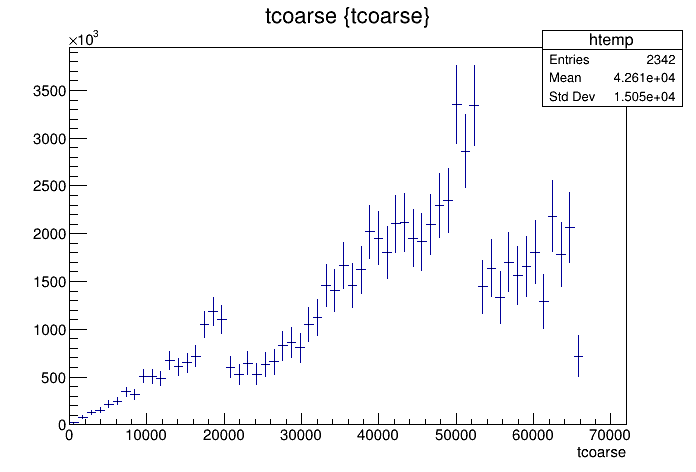

In [41]:
f.tree.Draw("tcoarse","tcoarse")
c.Draw()

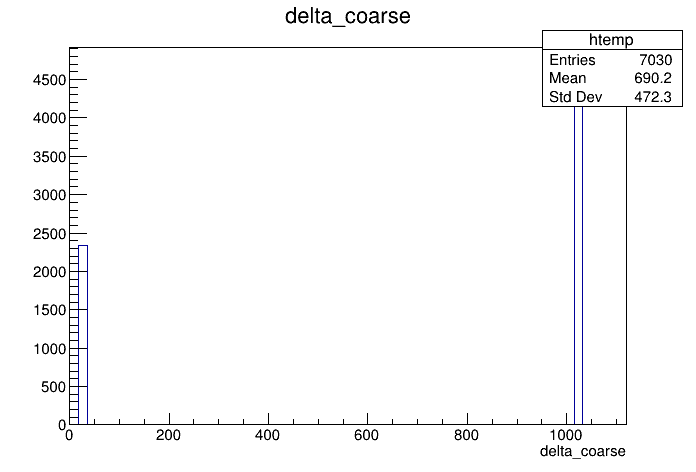

In [34]:
c.SetLogy(0)
f.tree.Draw("delta_coarse", "")
c.Draw()

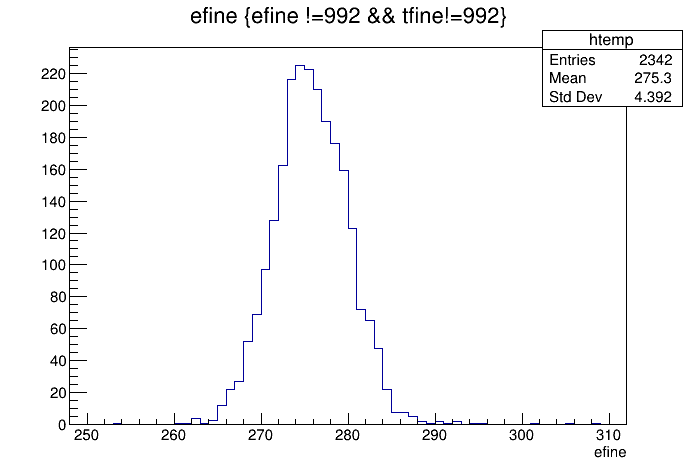

In [39]:
f.tree.Draw("efine","efine !=992 && tfine!=992")
c.Draw()

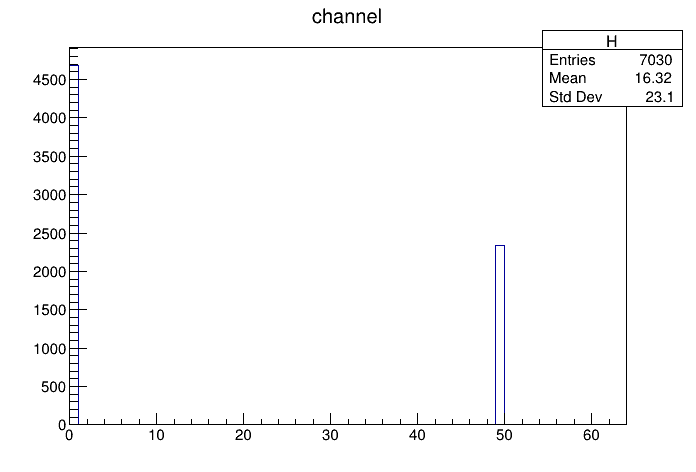

In [30]:
f.tree.Draw("channel>>H(64,0,64)","","")
c.Draw()\

In [31]:
eff_ch_0=R.H.GetBinContent(1)/1759853
eff_ch_1=R.H.GetBinContent(2)/1759853

AttributeError: 'PyROOT_NoneType' object has no attribute 'GetBinContent'

In [32]:
eff_ch_0

0.002663858856393119

In [33]:
eff_ch_1

0.0